In [1]:
# 1. Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:

# 2. Load dataset
df = pd.read_csv("Iris.csv")

In [3]:
# 3. Print number of rows and columns
print("Rows and Columns:", df.shape)

Rows and Columns: (150, 6)


In [4]:
# 4. Print dataframe info including data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [34]:
# 5. Print attribute names
print("Attribute names:", df.columns.tolist())

Attribute names: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [6]:
# 6. Print top 5 rows
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [7]:
# 7. Print bottom 5 rows
print(df.tail())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  


In [8]:
# 8. Print the unique class labels
print("Unique class labels:", df['Species'].unique())

Unique class labels: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [9]:
# 9. Print number of examples from each species; check for missing values
print(df['Species'].value_counts())
print("Missing values:\n", df.isnull().sum())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
Missing values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [10]:
# 10. Drop the 'Id' column
df = df.drop(columns=['Id'])

In [11]:

# 11. Print summary statistics
print(df.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


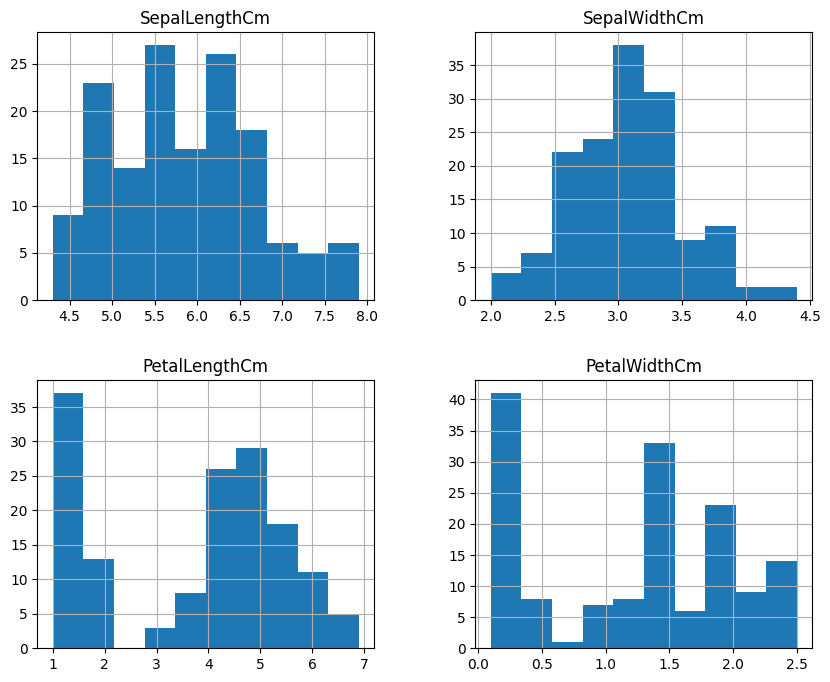

In [35]:
# 12. Plot histogram of all input features
df.hist(figsize=(10, 8))
# plt.tight_layout()
plt.show()

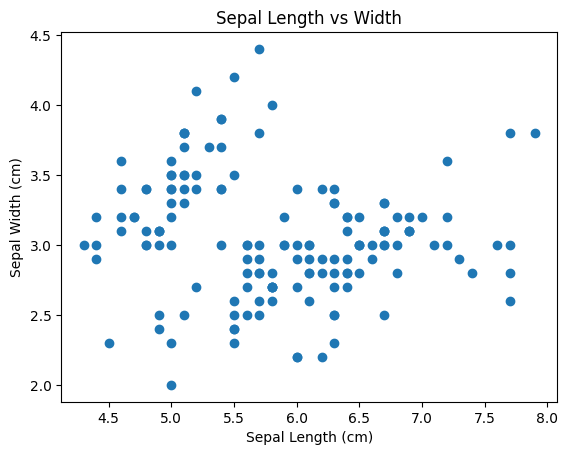

In [13]:
# 13. Scatter plot of SepalLengthCm vs SepalWidthCm
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Length vs Width")
plt.show()

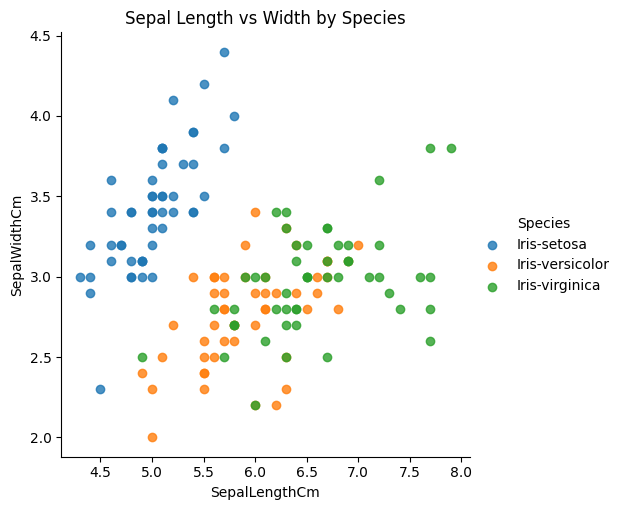

In [14]:
# 14. Scatter plot using seaborn’s FacetGrid
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df, fit_reg=False)
plt.title("Sepal Length vs Width by Species")
plt.show()

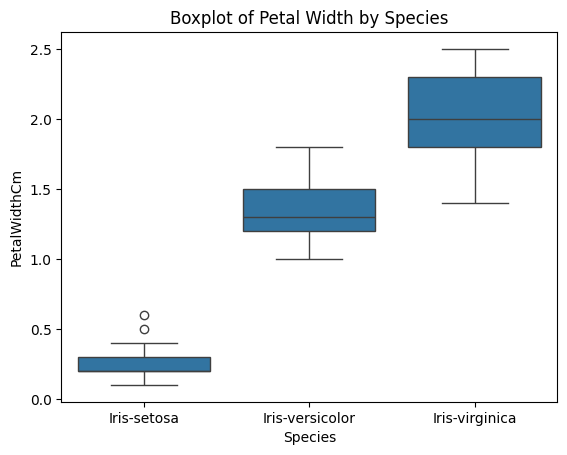

In [15]:

# 15. Boxplot of PetalWidthCm by Species
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.title("Boxplot of Petal Width by Species")
plt.show()

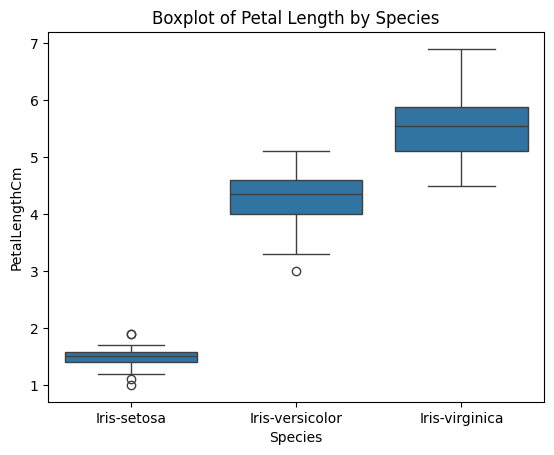

In [16]:
# 16. Boxplot of PetalLengthCm by Species
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title("Boxplot of Petal Length by Species")
plt.show()

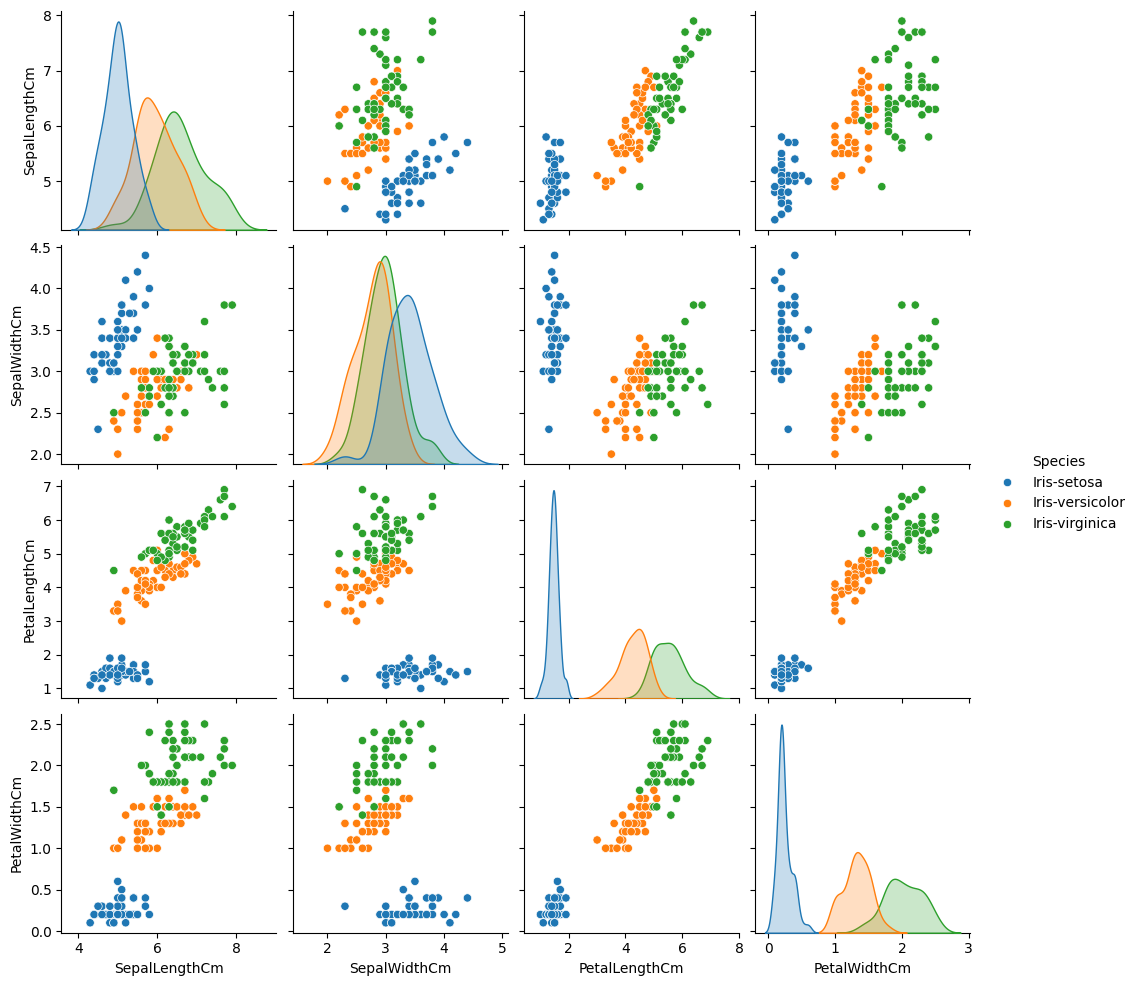

In [17]:

# 17. Pairplot of all features colored by Species
sns.pairplot(df, hue='Species')
plt.show()

In [18]:
# 18. Print correlation matrix
print("Correlation matrix:\n", df.drop(columns=['Id', 'Species'], errors='ignore').corr())

Correlation matrix:
                SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


In [19]:

# 19. Prepare X and y
X = df.drop(columns=['Species'])
y = df['Species']

In [20]:
# 20. Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [21]:
# 21. Read the documentation of sklearn.svm.SVC (done offline)

# 22. Model building step begins

In [22]:
# 23. Instantiate an object of SVC with cost C = 1
svc = SVC(C=1)

In [23]:
# 24. Fit the SVC model
svc.fit(X_train, y_train)

SVC(C=1)

In [24]:

# 25. Predict using the trained model
y_pred = svc.predict(X_test)

In [25]:
# 26. Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


In [26]:
# 27. Print additional metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777


In [27]:

# 28. Already printed above

# 29. K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

In [28]:

# 30. Use GridSearchCV to find the optimal value of C
param_grid = {'C': [0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(SVC(), param_grid, cv=kf, return_train_score=True)

In [29]:
# 31 & 32. Already set above

# 33. Fit the model using GridSearchCV
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             return_train_score=True)

In [30]:
# 34. Print the scores of grid search as dataframe
cv_results = pd.DataFrame(grid.cv_results_)
print(cv_results[['param_C', 'mean_train_score', 'mean_test_score']])

   param_C  mean_train_score  mean_test_score
0      0.1          0.802381         0.780952
1      1.0          0.964286         0.952381
2     10.0          0.980952         0.961905
3    100.0          0.980952         0.952381
4   1000.0          0.980952         0.933333


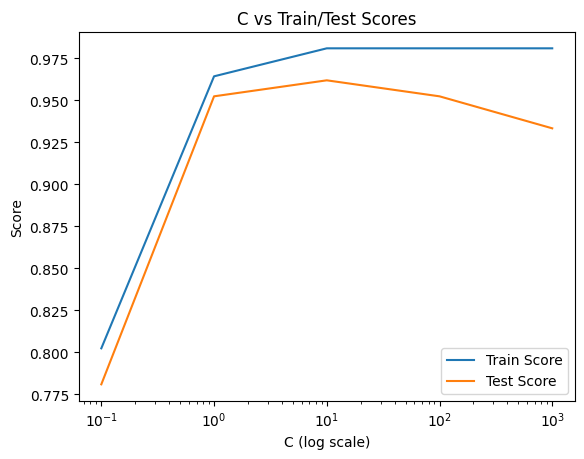

In [31]:

# 35. Plot C vs train/test scores
plt.plot(param_grid['C'], cv_results['mean_train_score'], label='Train Score')
plt.plot(param_grid['C'], cv_results['mean_test_score'], label='Test Score')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Score')
plt.title('C vs Train/Test Scores')
plt.legend()
plt.show()

In [32]:
# 36. Best score and best C value
print("Best Score:", grid.best_score_)
print("Best C Value:", grid.best_params_['C'])

Best Score: 0.9619047619047618
Best C Value: 10
